In [153]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,accuracy_score, confusion_matrix, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [171]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [172]:
train['TP_SEXO'].loc[train['TP_SEXO']=='M'] = 1
train['TP_SEXO'].loc[train['TP_SEXO']=='F'] = 0

c:\users\miyaz\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [173]:
idade = pd.DataFrame({
    'treineiro' : train['IN_TREINEIRO'],
    'idade': train['NU_IDADE'],
    'sexo': train['TP_SEXO'],
    'ano': train['TP_ANO_CONCLUIU'],
    'conclusao': train['TP_ST_CONCLUSAO'],
    'escola': train['TP_ESCOLA']
}
)

In [174]:
idade.corr()

,treineiro,idade,ano,conclusao,escola
treineiro,1.000000,-0.295091,-0.257710,0.533983,-0.244562
idade,-0.295091,1.000000,0.681435,-0.253403,-0.296328
ano,-0.257710,0.681435,1.000000,-0.592834,-0.422308
conclusao,0.533983,-0.253403,-0.592834,1.000000,0.156222
escola,-0.244562,-0.296328,-0.422308,0.156222,1.000000


In [175]:
features = ['NU_IDADE','TP_ANO_CONCLUIU', 'TP_ST_CONCLUSAO','TP_ESCOLA' ]
y = train['IN_TREINEIRO']
X = train[features]

In [184]:
modelo = RandomForestClassifier()
modelo.fit(train[features], y)
y_pred = modelo.predict(test[features])

In [185]:
confusion_matrix(y, modelo.predict(X))

array([[11947,     0],
       [   41,  1742]], dtype=int64)

In [161]:
pd.crosstab(y, modelo.predict(X))

col_0,0,1
IN_TREINEIRO,,
0,11947,0
1,41,1742


In [162]:
modelo.score(X,y)

0.9970138383102695

In [163]:
resp = test[['NU_INSCRICAO']]
resp['IN_TREINEIRO'] = y_pred

c:\users\miyaz\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [164]:
resp.to_csv('answer.csv', index = False, header=True)

In [165]:
yhat = modelo.predict_proba(X)

In [166]:
yhat = yhat[:,1]

In [167]:
yhat

array([0., 0., 0., ..., 1., 0., 0.])

In [168]:
roc_auc_score(y, yhat)

0.9998017510597024

In [169]:
def plot_roc_curve(y_true, y_score, figsize=(10,6)):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.figure(figsize=figsize)
    auc_value = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

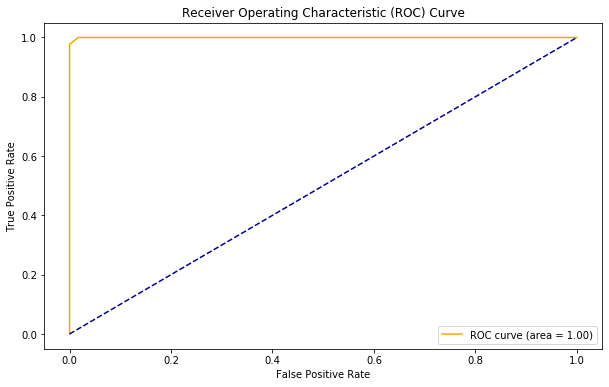

In [170]:
plot_roc_curve(y, yhat)